In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("500_Person_Gender_Height_Weight_Index.csv",sep=",")
df

Gender  Height  Weight  Index
0      Male     174      96      4
1      Male     189      87      2
2    Female     185     110      4
3    Female     195     104      3
4      Male     149      61      3
..      ...     ...     ...    ...
495  Female     150     153      5
496  Female     184     121      4
497  Female     141     136      5
498    Male     150      95      5
499    Male     173     131      5

[500 rows x 4 columns]

In [3]:
del df["Index"] # zmazem stlpec index 

In [4]:
bmi = []
for index, row in df.iterrows():
        bmi.append(round( df.iloc[index,2]/np.square(df.iloc[index,1]) *10000,1)) #BMI = m/h²
df["BMI"] = bmi # pridavam novy stlpec BMI

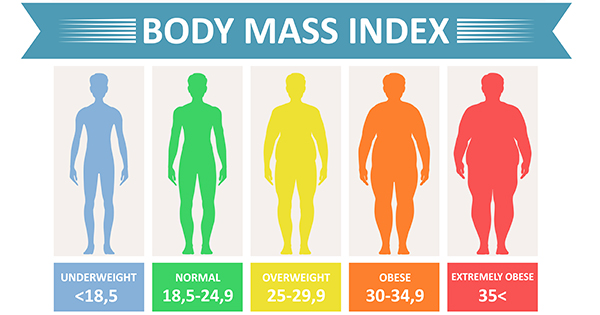

In [5]:
from IPython.display import Image
Image("img_bmi.jpg")

In [6]:
categories = []
for index, row in df.iterrows():
    if ( df.iloc[index,3] <= 18.5 ):
        categories.append(1) # underweight = podvaha
        
    elif ( 18.5 < df.iloc[index,3] <= 24.9 ):
        categories.append(2) # normal = normalna vaha
        
    elif ( 25 <= df.iloc[index,3] <= 29.9 ):
        categories.append(3) # overweight = nadvaha
    
    elif ( 30 <= df.iloc[index,3] <= 34.9 ):
        categories.append(4) # obese = obezny
        
    elif ( df.iloc[index,3] >= 35 ):
        categories.append(5) # extremely obese = extremne obezny
df["Category"] = categories 

In [7]:
df.head()

Gender  Height  Weight   BMI  Category
0    Male     174      96  31.7         4
1    Male     189      87  24.4         2
2  Female     185     110  32.1         4
3  Female     195     104  27.4         3
4    Male     149      61  27.5         3

In [8]:
df.sort_values(by=['BMI'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [9]:
df

Gender  Height  Weight   BMI  Category
0      Male     198      50  12.8         1
1    Female     198      50  12.8         1
2    Female     196      50  13.0         1
3    Female     190      50  13.9         1
4      Male     190      50  13.9         1
..      ...     ...     ...   ...       ...
495    Male     140     146  74.5         5
496  Female     140     146  74.5         5
497    Male     145     160  76.1         5
498    Male     140     152  77.6         5
499  Female     142     159  78.9         5

[500 rows x 5 columns]

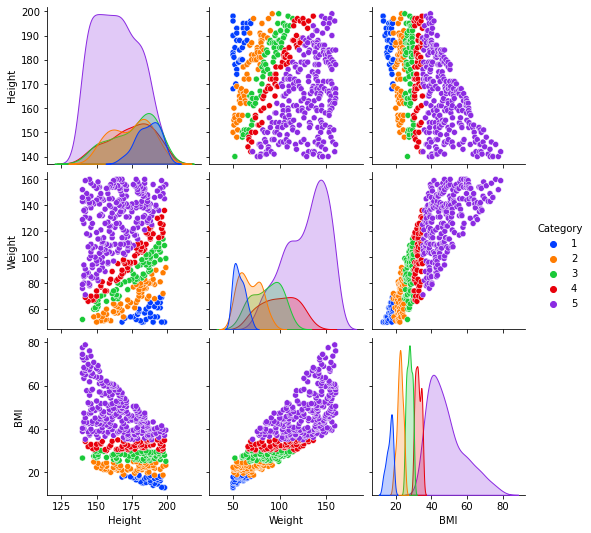

In [10]:
import seaborn as sns
sns.pairplot(data=df, hue='Category', palette= "bright")

In [11]:
df.Category.value_counts()

5    268
3     70
4     64
2     63
1     35
Name: Category, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

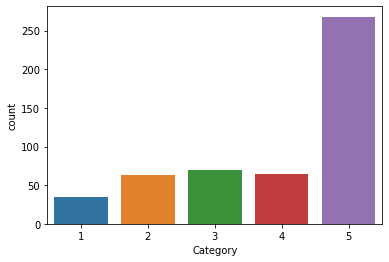

In [12]:
sns.countplot(x='Category',data=df)

<h1>Model - Keras</h1>

In [13]:
x = df.iloc[:,[1,2]].values # hodnoty o vyske a vahe
y = df.iloc[:,4].values # category

In [14]:
from keras.utils import to_categorical 
y = to_categorical(y)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2) # test size urci podiel. 80% ku 20% 

In [16]:
import keras 
from keras.models import Sequential # sekvencny model
from keras.layers import Dense # dense = vrstvy

In [17]:
moj_keras_model = Sequential()
moj_keras_model.add(Dense(30,input_dim=2,activation="tanh")) # aktivacna funkcia tanh
moj_keras_model.add(Dense(30,activation="tanh")) 
moj_keras_model.add(Dense(6))
moj_keras_model.compile(loss="mean_squared_error",optimizer="adam",metrics=["accuracy"])

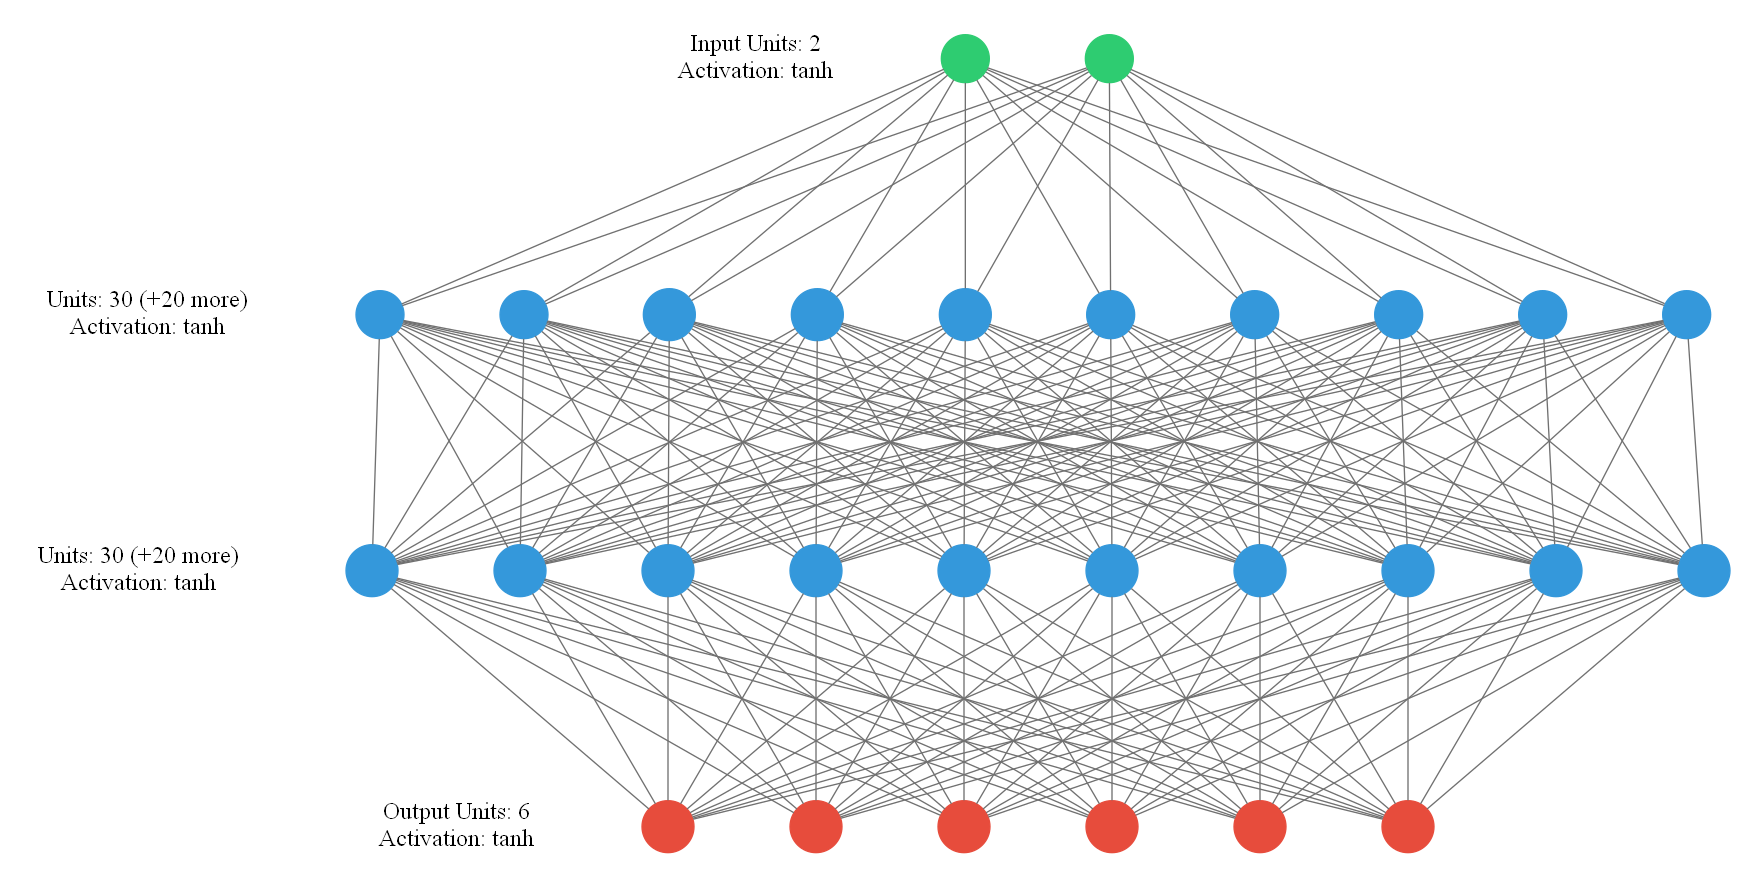

In [18]:
# img
from keras_visualizer import visualizer 
visualizer(moj_keras_model, filename='img_NS',format = "png",view=False)
Image("img_NS.png")

In [19]:
# trenovanie
history = moj_keras_model.fit(X_train,y_train,epochs=350)

Epoch 1/350
13/13 [==============================] - 0s 1ms/step - loss: 0.3701 - accuracy: 0.1276
Epoch 2/350
13/13 [==============================] - 0s 669us/step - loss: 0.1355 - accuracy: 0.5041
Epoch 3/350
13/13 [==============================] - 0s 1ms/step - loss: 0.1208 - accuracy: 0.4876
Epoch 4/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0912 - accuracy: 0.5437
Epoch 5/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0801 - accuracy: 0.6235
Epoch 6/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0774 - accuracy: 0.6612
Epoch 7/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0773 - accuracy: 0.6716
Epoch 8/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0709 - accuracy: 0.6894
Epoch 9/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0694 - accuracy: 0.6875
Epoch 10/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0695 - accuracy: 0.6546
Epoch 1

Epoch 82/350
13/13 [==============================] - 0s 667us/step - loss: 0.0580 - accuracy: 0.7496
Epoch 83/350
13/13 [==============================] - 0s 666us/step - loss: 0.0614 - accuracy: 0.7234
Epoch 84/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0543 - accuracy: 0.7616
Epoch 85/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0584 - accuracy: 0.7377
Epoch 86/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0581 - accuracy: 0.7250
Epoch 87/350
13/13 [==============================] - 0s 666us/step - loss: 0.0575 - accuracy: 0.7278
Epoch 88/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0566 - accuracy: 0.7381
Epoch 89/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0607 - accuracy: 0.7275
Epoch 90/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0593 - accuracy: 0.7403
Epoch 91/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0591 - accuracy: 0

13/13 [==============================] - 0s 1ms/step - loss: 0.0546 - accuracy: 0.7589
Epoch 164/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0549 - accuracy: 0.7317
Epoch 165/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0521 - accuracy: 0.7653
Epoch 166/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0490 - accuracy: 0.7863
Epoch 167/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0560 - accuracy: 0.7442
Epoch 168/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0505 - accuracy: 0.7789
Epoch 169/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0522 - accuracy: 0.7606
Epoch 170/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0573 - accuracy: 0.7384
Epoch 171/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0589 - accuracy: 0.7329
Epoch 172/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0552 - accuracy: 0.7289
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0563 - accuracy: 0.7426
Epoch 245/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.7523
Epoch 246/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.7846
Epoch 247/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0553 - accuracy: 0.7636
Epoch 248/350
13/13 [==============================] - 0s 2ms/step - loss: 0.0496 - accuracy: 0.7928
Epoch 249/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0495 - accuracy: 0.7911
Epoch 250/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0469 - accuracy: 0.7960
Epoch 251/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0540 - accuracy: 0.7710
Epoch 252/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0549 - accuracy: 0.7709
Epoch 253/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0531 - accuracy: 0.7766
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0481 - accuracy: 0.7820
Epoch 326/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0480 - accuracy: 0.7990
Epoch 327/350
13/13 [==============================] - 0s 666us/step - loss: 0.0531 - accuracy: 0.7729
Epoch 328/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0497 - accuracy: 0.7852
Epoch 329/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0488 - accuracy: 0.7890
Epoch 330/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0534 - accuracy: 0.7630
Epoch 331/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0478 - accuracy: 0.7853
Epoch 332/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0522 - accuracy: 0.7806
Epoch 333/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0510 - accuracy: 0.7704
Epoch 334/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0503 - accuracy: 0.7917
Ep

In [20]:
maxPresnost = max(history.history["accuracy"])*100
minPresnost = min(history.history["accuracy"])*100
print("Maximalna presnost pri trenovani NS: %.0f"%maxPresnost, "%")
print("Minimalna presnost pri trenovani NS: %.0f"%minPresnost, "%")

Maximalna presnost pri trenovani NS: 80 %
Minimalna presnost pri trenovani NS: 17 %


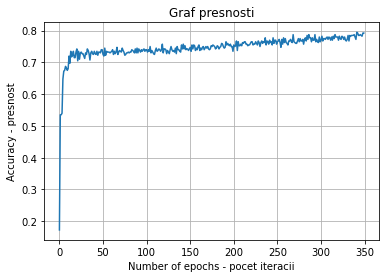

In [21]:
plt.title("Graf presnosti")
plt.plot(history.history["accuracy"])
plt.xlabel("Number of epochs - pocet iteracii")
plt.ylabel("Accuracy - presnost")
plt.grid()
plt.show()

In [22]:
maxChybovost = max(history.history["loss"])*100
minChybovost = min(history.history["loss"])*100
print("Maximalna chybovost pri trenovani NS: %.0f"%maxChybovost, "%")
print("Minimalna chybovost pri trenovani NS: %.0f"%minChybovost, "%")

Maximalna chybovost pri trenovani NS: 29 %
Minimalna chybovost pri trenovani NS: 5 %


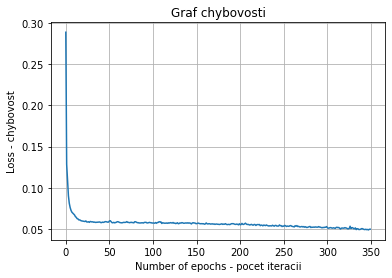

In [23]:
plt.title('Graf chybovosti')
plt.plot(history.history['loss'])
plt.xlabel('Number of epochs - pocet iteracii')
plt.ylabel('Loss - chybovost')
plt.grid()
plt.show()

In [24]:
# predikcie
predikcie = moj_keras_model.predict_classes(X_test)
predikcie

C:\Users\keres\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([5, 3, 3, 1, 3, 5, 2, 3, 5, 3, 3, 5, 5, 3, 1, 3, 5, 5, 1, 5, 2, 5,
       3, 3, 5, 5, 5, 5, 3, 5, 5, 1, 5, 5, 5, 5, 3, 5, 2, 3, 5, 1, 5, 5,
       5, 5, 5, 5, 5, 5, 3, 5, 3, 5, 5, 5, 2, 5, 5, 5, 3, 5, 4, 4, 3, 5,
       5, 3, 4, 3, 5, 5, 5, 5, 3, 3, 5, 3, 5, 3, 2, 5, 5, 1, 5, 5, 3, 3,
       5, 4, 5, 5, 5, 5, 3, 4, 5, 5, 5, 5], dtype=int64)

In [25]:
# skutocne hodnoty
y_test.argmax(1) #argmax vrati poziciu najvacsej hodnoty

array([5, 3, 3, 2, 3, 5, 2, 4, 5, 3, 4, 5, 5, 4, 1, 2, 5, 5, 2, 5, 2, 5,
       4, 3, 5, 5, 5, 5, 3, 5, 5, 1, 5, 4, 5, 5, 4, 4, 2, 4, 5, 2, 5, 5,
       5, 5, 4, 5, 5, 5, 3, 5, 3, 5, 5, 5, 2, 5, 5, 5, 2, 4, 4, 5, 2, 5,
       4, 3, 5, 3, 5, 5, 5, 5, 2, 3, 5, 3, 5, 4, 2, 5, 4, 1, 5, 5, 3, 2,
       5, 4, 5, 5, 5, 5, 2, 4, 5, 5, 5, 5], dtype=int64)

In [26]:
# zistime aky je presny model
from sklearn import metrics
presnost = metrics.accuracy_score(predikcie, y_test.argmax(1))*100 
print('Presnost modelu: ', presnost, "%")

Presnost modelu:  76.0 %
